Q1

Simple linear regression models the relationship between a single independent variable and a dependent variable, assuming a linear relationship.
Multiple Linear Regression includes multiple independent variables, allowing it to capture more complex relationships and better account for variability in the dependent variable.

Continuous variable is a variable that can take any value within a range. In SLR, a continuous predictor implies a smooth, continuous effect on the outcome. 
Indicator variable is a binary (0/1) variable that represents categories. It shifts the outcome by a fixed amount depending on the category.

Adding an indicator variable in MLR with a continuous predictor means the model can now differentiate two groups and assign them different baseline intercepts, while the continuous predictor affects both groups similarly.

When using only indicator variables derived from a multi-level categorical predictor, the MLR models separate intercepts for each category without continuous predictors.


https://chatgpt.com/share/672fee13-ab5c-8001-99ae-a4c407f7d2e7

Q2

Outcome variable:The sales revenue generated from the advertising campaigns. 
Predictor variables:TV ad spending and Online ad spending

1)Two potential linear models we could use are 
Model without interaction: 
Sales revenue=B0+B1xTV_ad_spend+B2xonlinne_ad_spend+e

This model assumes that each type of ad spending has an independent effect on sales revenue. Here, TV and online ad spending contribute to the sales revenue linearly without modifying each other’s effectiveness.
The predicts that an increase in TV or online ad spending will linearly increase sales revenue by a fixed amount, without any dependency on the other type of ad spending.

Model with interaction
Sales revenue= B0+B1xTV_ad_spend+B2xOnline_ad_spend+B3x(TV-ad_spendxOnline_ad_spend)

In this model, the interaction term (β3×TV_Ad_Spend×Online_Ad_Spend\beta_3 \times \text{TV\_Ad\_Spend} \times \text{Online\_Ad\_Spend}β3​×TV_Ad_Spend×Online_Ad_Spend) allows the effectiveness of TV ad spending to vary depending on the amount of online ad spending, and vice versa. This interaction term could either amplify or diminish the effect of the individual ad spends, depending on the nature of the relationship.
This predicts that the effect of TV ad spending on sales may change based on the level of online ad spending, and vice versa. This can create more complex, non-linear changes in sales revenue depending on how much is spent on both types of advertising.

2) Now suppose ad budget are categorized as “high” or “low” rather than being continuous, each predictor is now a binary variable, where:
TV_AD_Budget: 1 if high, 0 if low
Online_Ad_Budget: 1 if high, 0 if low

The model will now look like this:
Without interaction:
Sales Revenue=B0+B1xTV_Ad_Budget+B2xOnline_Ad_Budget+e
With interaction:
Sales Revenue=B0+B1=TV_Ad_Budget+B2xOnline_Ad_Budget+B3x(TV_Ad_BudgetxOnline_Ad_Budget)+e

Prediction:
Model without interaction: Predicts different average sales revenues based on whether the ad budgets are high or low in each category independently. 
Model with interaction: Allows for a combination effect. For instance, if both ad budgets are high (TV_Ad_Budget = 1 and Online_Ad_Budget = 1), the interaction term captures any additional impact on sales that results specifically from having both high ad budgets.

https://chatgpt.com/share/672ff8b0-6e54-8001-a112-7786aca0b32b

Q3

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Load the Pokémon dataset
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url).fillna('None')

# Create a binary outcome variable for whether the Pokémon's primary type is "Fire"
pokeaman['str8fyre'] = (pokeaman['Type 1'] == 'Fire').astype(int)

# Define the logistic regression formula with interactions
linear_model_specification_formula = 'str8fyre ~ Attack*Legendary + Defense*I(Q("Type 2")=="None") + C(Generation)'

# Fit the logistic regression model
log_reg_fit = smf.logit(linear_model_specification_formula, data=pokeaman).fit()

# Display the summary of the logistic regression model
print(log_reg_fit.summary())


https://chatgpt.com/share/6733af39-d72c-8001-9a88-3dd746b9c2d0

Q4

To interpret statistical models, there are 2 factors that need to be considered. First, is the overall model fit, which measures the proportion of variance in the dependent variable that is explained by the independent variables. A 17.6% R-squared value suggests that the model explains only a small fraction of the variability in HP, meaning there are other factors not included in the model that could have an influence on HP. Secondly, the statistical significance of individual coefficients tests whether each predictor variable has a non-zero association with the dependent variable.Strong evidence against the null hypothesis for these coefficients suggests that there is a statistically significant association between these predictors and HP, even i the overall model doesn't explain much of variance.

Chatbot summary:Here’s a summary of our interaction, structured to highlight key points for your assignment:

---

Interaction Summary:

In this interaction, we discussed the interpretation of model fit and statistical significance in the context of an ordinary least squares (OLS) regression model. Specifically, I helped clarify the apparent contradiction between low model fit and significant coefficients.

1.Objective: The goal was to understand why, in a regression model where the R-squared value indicates that only 17.6% of the variance in HP is explained, many coefficients still exhibit strong or very strong evidence against the null hypothesis (low p-values).

2。Explanation of Model Fit (R-squared):
   -The R-squared value indicates the proportion of the dependent variable's variance explained by the model's independent variables.
   -A low R-squared (17.6%) implies that while some variance in HP is explained by the included predictors (Sp. Def and Generation), much of it remains unexplained, likely due to factors not captured in the model.

3.Significance of Individual Coefficients (p-values):
   -Despite the low R-squared, individual predictors (e.g., Sp. Def and Generation) have low p-values, indicating that they are statistically significant.
   -Low p-values suggest there is enough evidence to reject the null hypothesis for these coefficients, implying a non-zero association between these predictors and `HP`, even if the effect size is relatively modest.

4.Conclusion:
   -The situation highlights an important aspect of statistical modeling: a model can have statistically significant predictors yet still exhibit a low overall fit if the dependent variable is influenced by factors not included in the model.
   -This reinforces that R-squared and p-values should be interpreted together, as each provides different insights into the model's explanatory power and the reliability of specific predictors.

---

This summary encapsulates our discussion on how model fit (R-squared) and coefficient significance (p-values) can coexist meaningfully within an OLS regression model, providing a nuanced understanding of statistical results.

Q5

First cell: This cell prepares and splits the dataset. The pokemon dataframe undergoes:
-Handling missing values in the “Type 2” column by replacing NaN with “None”.
-A random seed is set for reproducibility.
-A 50/50 split for training and testing using train_test_plit

Second cell: Here, an ordinary Least Squares regression model is specific with HP as the dependent variable and Attack and Defense as independent variables. The model is fitted using the training dataset, and a summary of the fit is generated.

Third cell: This cell evaluates the model in terms of how well it predicts HP. It reports both “in-sample”R^2 and “out-of-sample” R^2, providing an indication of model performance and potential overfitting.

Fourth cell:  This cell sets up a more complex OLS regression model, adding more predictor variables and interaction terms. The interactions can capture non-linear relationships but can also complicate the model substantially, as united in the comment, which avoids including too many interaction terms to prevent computational overload.

Fifth cell: Similar to the third cell, this cell evaluates model4 using both in-sample and out-of-sample R^2 values. The comparison between model3 and model4 gives insight into whether adding complexity improves predictive accuracy or possibly introduces overfitting.

Q6

The key is to understand the model’s “design matrix” and multicollinearity influence generalization. 
-Design matrix, model4_spec.exog, is a structured matrix where each row corresponds to an observation, and each column represents a predictor variable or interaction term. For model4_linear_form, complex interactions such as Attack * Defense * Speed * Legendary * Sp.DEf * Sp.Atk  leads to a large number of predictor variables. Each interaction term adds a new column, often increasing redundancy among variables, which can result in multicollinearity. 
-Multicollinearity arises when predictor variables are highly correlated, making it difficult for the model to isolate each variable’s impact. THis is quantified by a high condition number in the model summary. High condition numbers indicate severe multicollinearity, leading to instability in the model’s coefficients and reducing its ability to generalize to new data. This often results in poor “out-of-sample” R^2, meaning the model performs well on training data but fails to predict well on test data.
-To address multicollinearity, predictors are centered and scaled. This transformation, done in model3_linear_form_center_scale and model4_linear_form_CS, typically reduces correlations among predictors and improves numerical stability. While centering and scaling reduced the condition number for the simpler model3 model, they did not fully resolve multicollinearity for the more complex model4. This suggests the complexity and interdependence of the predictors remain problematic, limiting generalizability.

Q7

Model 5:
Extended from model3 and model4 by adding individual predictors (Attack, Defense, Speed, Legendary, Sp. Def, Sp. Atk) and categorical variables (Generation, Type 1, Type 2) without excessive interaction terms.
This approach aims to capture a broad range of factors influencing HP while avoiding the overwhelming complexity of model4.
Model 6:
Refined from model5 by including only significant predictors and selected categorical indicators (Type 1 values for "Normal" and "Water," and Generation values for 2 and 5).
This selective inclusion reduces model complexity, potentially enhancing out-of-sample prediction by focusing on impactful variables.
Model 7:
Further evolved from model6 by introducing interaction terms (Attack * Speed * Sp. Def * Sp. Atk) to explore interactions among key continuous predictors while retaining specific indicators.
This design aims to improve model expressiveness for complex relationships without overfitting, especially when combined with centering and scaling in model7_CS, which significantly reduces multicollinearity (as seen by a lower Condition Number).

https://chatgpt.com/share/6733c26e-3ca0-8001-89bc-89c1033393df

Q8

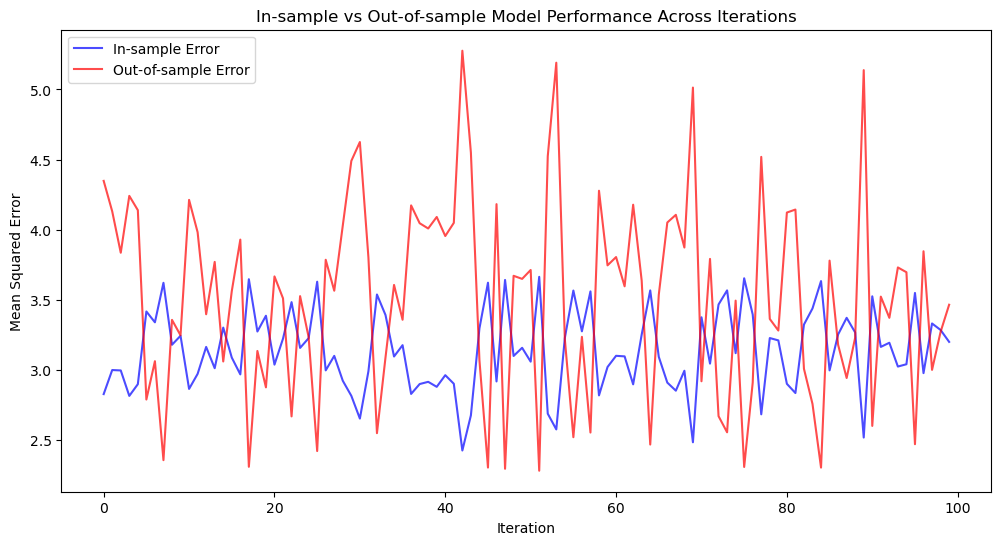

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Random dataset of 100 samples
y = 3 * X.squeeze() + np.random.randn(100) * 2  # Linear relationship with noise

# Lists to store in-sample and out-of-sample errors
in_sample_errors = []
out_of_sample_errors = []

# Number of different train-test splits to simulate
num_iterations = 100

for i in range(num_iterations):
    # Randomly split data into train and test sets without setting a seed
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # Fit a simple linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Compute the Mean Squared Error for both in-sample and out-of-sample
    in_sample_error = mean_squared_error(y_train, model.predict(X_train))
    out_of_sample_error = mean_squared_error(y_test, model.predict(X_test))
    
    # Append errors to the lists
    in_sample_errors.append(in_sample_error)
    out_of_sample_errors.append(out_of_sample_error)

# Plotting the errors to visualize their distribution
plt.figure(figsize=(12, 6))
plt.plot(in_sample_errors, label="In-sample Error", color="blue", alpha=0.7)
plt.plot(out_of_sample_errors, label="Out-of-sample Error", color="red", alpha=0.7)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("In-sample vs Out-of-sample Model Performance Across Iterations")
plt.legend()
plt.show()


In the demonstration, multiple iterations of a simple linear regression model were executed on random splits of data. Each time, we capture the model’s performance on both the training set and the test set. By not setting a random seed each time, we allow different random splits of data, which will vary slightly in their composition of training and test sets, thereby impacting model performance.
The purpose of this demonstration is to:
-Show variability in model performance.
-Highlight the difference between in-sample and out-of-sample errors.
-Emphasize the importance of multiple testing runs.

https://chatgpt.com/share/6733c3a9-2428-8001-8ffd-c5384e63c73b

Q9

Model Fitting by Generation: 
   -Two models (model7 and model6) are each fitted separately using data from specific generations.
   -Each model is tested with different subsets of the dataset based on Pokémon generations:
     -Generation == 1: Only Pokémon from Generation 1.
     -Generation != 1: Pokémon from generations other than 1.
     -Generation != 6: Pokémon from generations 1 through 5.
     -Generation == 6: Only Pokémon from Generation 6.
   
In-sample R-squared: 
   -This metric measures the fit of the model on the training data it was built on.
   -Higher in-sample R-squared values suggest that the model explains a good proportion of the variance in the training data.

Out-of-sample R-squared: 
   -Calculated by comparing the predicted HP with actual HP values for test data that wasn't used to build the model.
   -This value reflects how well the model generalizes to new data. Lower out-of-sample R-squared values may indicate that the model doesn’t perform well when predicting outside its training set.

Evaluating Different Data Splits:
   -model7_gen1_predict_future_fit and model6_gen1_predict_future_fit are trained on Generation 1 and tested on other generations.
   -model7_gen1to5_predict_future_fit and model6_gen1to5_predict_future_fit are trained on Generations 1 to 5 and tested on Generation 6.
   -Comparing R-squared values between these subsets shows how well each model can generalize to new generations.

Interpretation:
   -High in-sample R-squared but low out-of-sample R-squared indicates overfitting, where the model fits well on the training data but poorly on new data.
   -Similar in-sample and out-of-sample R-squared values suggest the model generalizes well.


https://chatgpt.com/share/6733cadf-88a0-8001-8d44-9cf69527c510